In [5]:
import csv
import numpy as np
import matplotlib.pylab as plt
import matplotlib
from datetime import datetime


def import_data(filename, n_wheels):
    with open(filename) as fh:
        reader = csv.reader(fh, delimiter='\t')
        rows = [[r[0]] + list(map(int, r[1:])) for r in reader]

    data = np.zeros((len(rows), n_wheels))
    for i, row in enumerate(rows):
        data[i, :] = row[1:1 + n_wheels]
    return data.T, [r[0] for r in rows]


def plot_actogram(data, times, n_wheels, animals):
    if n_wheels != len(animals):
        raise Exception("Animals doesn't match n_wheels")

    N, T = data.shape
    data /= np.max(data)
    times = [datetime.strptime(t, '%m/%d/%y %H:%M') for t in times]
    times = matplotlib.dates.date2num(times)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(N):
        d = data[i, :] != 0
        plt.plot_date(times[d], data[i, d] + i, '.', markersize=2, xdate=True)

    plt.grid(which='both')

    major_ticks = np.arange(8) + .25
    minor_ticks = np.arange(32) * .25
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.set_yticklabels(animals)
    ax.grid(which='minor', alpha=0.4)

    vals = ax.get_xticks()
    minor = []
    for i, val in enumerate(vals):
        for t in range(4):
            minor.append(val + t / 4.)
    ax.set_xticks(minor, minor=True)
    ax.grid(which='minor', alpha=0.4)

    plt.tight_layout()
    plt.show()

# if __name__ == '__main__':
#     n_wheels = 8
#     animals = ['1730', '1734', '1736', '1743', '1744', '1745', '1746', '1747']
#     filename = r'E:\image j text.txt'
#     data, t = import_data(filename, n_wheels)
#     plot_actogram(data, t, n_wheels, animals)


In [7]:
03/01/21 08:00	0	2	1	3	0	0	1	2
03/01/21 08:15	1	0	2	4	1	1	3	2
03/01/21 08:30	2	1	0	2	1	2	4	3
03/01/21 08:45	1	2	1	3	0	1	2	1
03/01/21 09:00	3	2	1	2	1	3	1	2

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (3176217266.py, line 1)

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import os

col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]

for i in range(1, 33):
    col_names.append(f"Sp{i}")

file = 'Steatoda B masking 10 pm.txt'

df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
df = df.set_index('Index')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')


month_map = {'Jan': 1, 'Feb': 2, 'Mar' : 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['DateM'] = df['DateM'].str[:3].map(month_map)
df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

df.insert(0, 'Day', df['Time'].dt.day.map(day_map))

#df.to_csv('steatodaA.csv')
display(df)

,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-04-10 09:38:00,1,9,1,2,1,3,1,1,...,1,0,0,0,0,0,0,0,0,0
2,1,2024-04-10 09:39:00,1,0,0,0,0,4,0,2,...,0,0,0,0,0,0,0,0,0,0
3,1,2024-04-10 09:40:00,1,0,0,0,0,8,0,0,...,2,0,0,0,0,0,0,0,0,0
4,1,2024-04-10 09:41:00,1,0,0,0,0,2,0,7,...,7,0,0,0,0,0,0,0,0,0
5,1,2024-04-10 09:42:00,1,2,0,0,0,6,0,2,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,6,2024-04-15 15:38:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7562,6,2024-04-15 15:39:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,6,2024-04-15 15:40:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


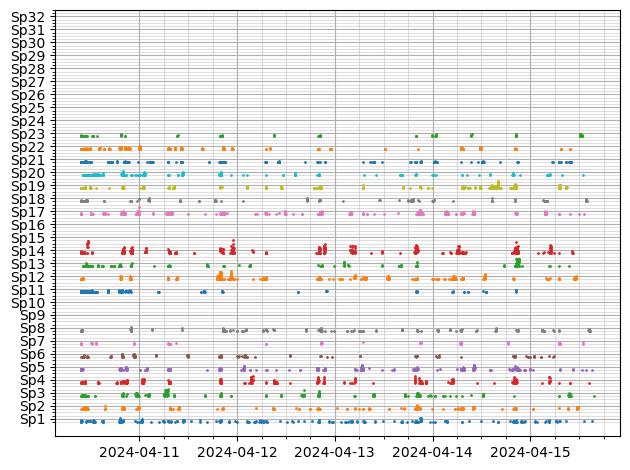

In [23]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
from datetime import datetime

# Modified import_data function to handle DataFrame
def import_data_from_df(df, n_wheels):
    data = df.iloc[:, 3:3 + n_wheels].values.T  # Extracts data from columns Sp1 to Sp32 and transposes it
    times = df['Time'].astype(str).tolist()     # Converts the 'Time' column to a list of strings
    return data, times

def plot_actogram(data, times, n_wheels, animals):
    if n_wheels != len(animals):
        raise Exception("Animals doesn't match n_wheels")

    N, T = data.shape
    data = data.astype(float)  # Convert data to float for division
    data /= np.max(data)
    times = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in times]  # Adjusted date format
    times = matplotlib.dates.date2num(times)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(N):
        d = data[i, :] != 0
        plt.plot_date(times[d], data[i, d] + i, '.', markersize=2, xdate=True)

    plt.grid(which='both')

    major_ticks = np.arange(n_wheels) + .25
    minor_ticks = np.arange(n_wheels * 4) * .25
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.set_yticklabels(animals)
    ax.grid(which='minor', alpha=0.4)

    vals = ax.get_xticks()
    minor = []
    for i, val in enumerate(vals):
        for t in range(4):
            minor.append(val + t / 4.)
    ax.set_xticks(minor, minor=True)
    ax.grid(which='minor', alpha=0.4)

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == '__main__':
    n_wheels = 32
    animals = [f'Sp{i}' for i in range(1, 33)]
    
    # Assuming `df` is the DataFrame you've shown
    data, t = import_data_from_df(df, n_wheels)
    plot_actogram(data, t, n_wheels, animals)
